In [1]:
import sys, os, path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch,torchcde
from sktime.transformations.panel.signature_based import SignatureTransformer

/mnt/sdd/MSc_projects/jbarker/venvs/v_proj_1/lib/python3.9/site-packages/sktime/datatypes/_series/_check.py:42: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/mnt/sdd/MSc_projects/jbarker/venvs/v_proj_1/lib/python3.9/site-packages/sktime/datatypes/_panel/_check.py:45: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
/mnt/sdd/MSc_projects/jbarker/venvs/v_proj_1/lib/python3.9/site-packages/sktime/datatypes/_panel/_check.py:46: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_MULTIINDEX_TYPES = (pd.In

## Load Data

In [4]:
train_list_file_df = pd.read_csv(path.train_listfile_path)
train_dfs = [pd.read_csv(f) for f in path.train_episode_paths]

test_list_file_df = pd.read_csv(path.train_listfile_path)
test_dfs = [pd.read_csv(f) for f in path.train_episode_paths]

In [5]:
X_train = [df.values for df in train_dfs]
X_test =  [df.values for df in test_dfs]

y_train = train_list_file_df.y_true.values
y_test  = test_list_file_df.y_true.values

In [6]:
train_df = pd.concat(train_dfs)
test_df = pd.concat(test_dfs)

## Summary Statistics

In [7]:
train_df.isna().mean()

Hours                                 0.000000
Capillary refill rate                 0.997941
Diastolic blood pressure              0.330525
Fraction inspired oxygen              0.944860
Glascow coma scale eye opening        0.819752
Glascow coma scale motor response     0.820642
Glascow coma scale total              0.892175
Glascow coma scale verbal response    0.820424
Glucose                               0.811520
Heart Rate                            0.305201
Height                                0.997328
Mean blood pressure                   0.335145
Oxygen saturation                     0.292271
Respiratory rate                      0.297547
Systolic blood pressure               0.330230
Temperature                           0.776786
Weight                                0.976263
pH                                    0.892035
dtype: float64

## Let's See What We Have

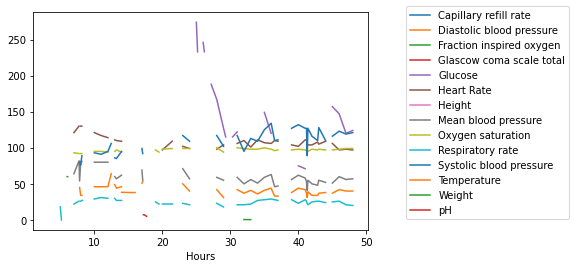

In [8]:
ax = train_dfs[3].plot(x='Hours')
ax.legend(bbox_to_anchor=(1.1, 1.05))

## Signatures

In [9]:
sig = SignatureTransformer(window_depth=1)

In [10]:
sig.fit_transform(train_dfs[0][numeric_cols].values)

NameError: name 'numeric_cols' is not defined